# Supervised Machine Learning with KNN and Decision tree




## k-Nearest Neighbours 



In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#seaborn: statistical data visualization. 
#Seaborn is a Python data visualization library based on matplotlib. 
#It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

#%matplotlib inline

#To switch to seaborn defaults, simply call the set() function.
sns.set()

**Data Loading**

In [30]:
# Load the dataset
data = pd.read_csv('/content/air_quality_daily.csv')

feature_names = ['CO(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

print('The shape of the dataset is ' + str(data.shape))
data.head()

The shape of the dataset is (391, 5)


DateTime  CO(GT)  PT08.S4(NO2)  PT08.S5(O3)     AQI
0  2004-03-10    1.97       1545.50      1096.00  374.44
1  2004-03-11    2.17       1522.83       885.25  331.71
2  2004-03-12    2.74       1627.29      1084.38  350.82
3  2004-03-13    2.61       1595.79      1245.92  387.11
4  2004-03-14    2.40       1602.38      1234.21  369.97

In [32]:
# define the bins and labels
bins = [-float('inf'), 50, 100, 150, 200, 300, float('inf')]
labels = [0, 1, 2, 3, 4, 5]

# bin the AQI data and map to the labels
data['AQI Interval'] = pd.cut(data['AQI'], bins=bins, labels=labels)
data['AQI Interval'] = data['AQI Interval'].astype(int)

# print the updated dataframe
data = data.drop('AQI', axis=1)
data.head()

DateTime  CO(GT)  PT08.S4(NO2)  PT08.S5(O3)  AQI Interval
0  2004-03-10    1.97       1545.50      1096.00             5
1  2004-03-11    2.17       1522.83       885.25             5
2  2004-03-12    2.74       1627.29      1084.38             5
3  2004-03-13    2.61       1595.79      1245.92             5
4  2004-03-14    2.40       1602.38      1234.21             5

In [33]:
data.columns

Index(['DateTime', 'CO(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'AQI Interval'], dtype='object')

In [35]:
X = data[feature_names]
y = data['AQI Interval']

In [36]:
X.head()

CO(GT)  PT08.S4(NO2)  PT08.S5(O3)
0    1.97       1545.50      1096.00
1    2.17       1522.83       885.25
2    2.74       1627.29      1084.38
3    2.61       1595.79      1245.92
4    2.40       1602.38      1234.21

In [37]:
y.head()

0    5
1    5
2    5
3    5
4    5
Name: AQI Interval, dtype: int64

**Data Visualisation**

Visualising the dataset is tricky with this dataset since it has 4 features. One way to visualise is using pairplot. Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: Use

<Figure size 432x288 with 0 Axes>

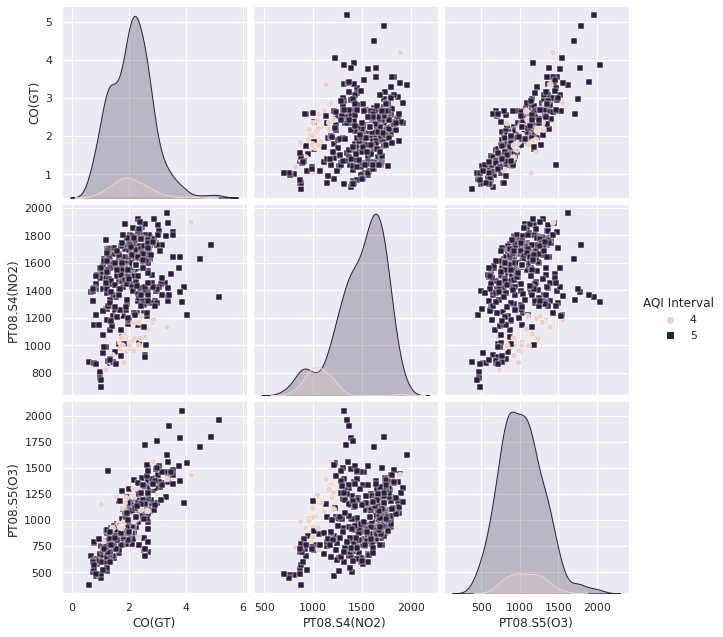

In [38]:
# View the relationships between variables; color code by species type
di = {0.0: 'CO(GT)', 1.0: 'PT08.S4(NO2)', 2.0:'PT08.S5(O3)'} # dictionary

plt.figure()
sns.pairplot(data.replace({'AQI Interval': di}), hue = "AQI Interval", size=3, markers=["o", "s", "D"])
plt.show()

Another way to visualise high dimensional features is using 3D plot using color, shape, size and other properties of 3D and 2D objects. In this plot, the 'mark sizes' is utilised to visualize fourth dimenssion which is Petal Width [cm].

In [39]:
X = data[feature_names].values   #To get the array of feature columns' values
y = data['AQI Interval'].values       #To get the array of target/labels

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(15, 10))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s =  X[:, 2]*50)

for name, label in [('CO(GT)', 0), ('PT08.S4(NO2)', 1), ('PT08.S5(O3)', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("CO(GT)", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PT08.S4(NO2)", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PT08.S5(O3)", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

<ipython-input-39-7fdb155d4f3a>:11: RuntimeWarning: Mean of empty slice.
  ax.text3D(X[y == label, 0].mean(),
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-39-7fdb155d4f3a>:12: RuntimeWarning: Mean of empty slice.
  X[y == label, 1].mean(),
<ipython-input-39-7fdb155d4f3a>:13: RuntimeWarning: Mean of empty slice.
  X[y == label, 2].mean(), name,
<ipython-input-39-7fdb155d4f3a>:19: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
<ipython-input-39-7fdb155d4f3a>:21: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
<ipython-input-39-7fdb155d4f3a>:23: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1

<Figure size 1080x720 with 0 Axes>

**Splitting the dataset into training set and test set**


In [40]:
X = data[feature_names].values   #To get the array of feature columns' values
y = data['AQI Interval'].values       #To get the array of target/labels

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)

print(f'training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples')

training set size: 312 samples 
test set size: 79 samples


Normalising the features of the dataset before training (One of the Feature Scaling Techniques). Used normalisation to bring all the feature values in the range of [0,1]

In [41]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train = scaler.fit_transform(X_train) #the scaler is fitted to the training set and then transformed
X_test = scaler.transform(X_test)       #the scaler is applied to the test set

**Making Predictions**

In [42]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
knn_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn_classifier.predict(X_test)

**Evaluating the predictions**

* Building confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  9],
       [ 1, 69]])

* Calculating model accuracy:

In [44]:
from sklearn.metrics import  accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the kNN classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of the kNN classifier is equal 87.34 %.


* Using cross-validation for parameter tuning. In kNN classifier, one of the main parameter that needs to be tuned is 'k' value. To find the optimum value for k (that is the number of neighbours to look into while classifying), the following steps are done

In [45]:
# creating list of K for KNN
k_list = list(range(1,20))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

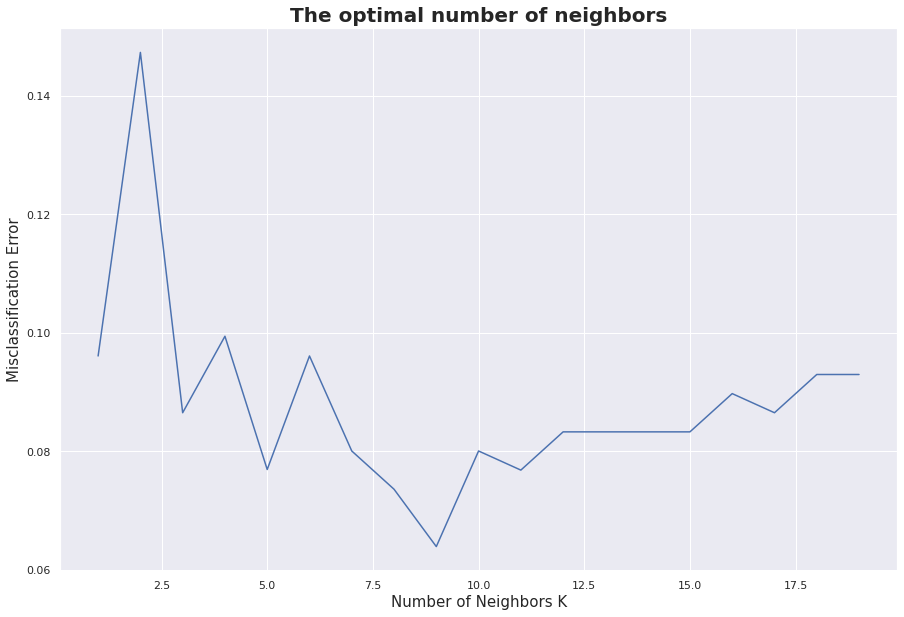

In [46]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [47]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


#  Decision Trees

Decision Tree is much more intuitive than the others for its explainability. Visualizing them is crucial in order to correctly understand how certain decisions are being made inside the algorithm, which is always important for business applications.

In [48]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
from sklearn import tree
fig, _ = plt.subplots(nrows=1, ncols=1, figsize=(100,50), dpi=300)
tree.plot_tree(
    decision_tree,
    feature_names=feature_names,
    filled=True
)
fig.savefig('tree.png')

* Using Decision tree to predict and then evaluating the model with the similar steps as we used with kNN classifier

In [50]:
y_pred = decision_tree.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the Decision Tree classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of the Decision Tree classifier is equal 87.34 %.


* Using cross validation score to evaluate the model

In [52]:
accuracy_list = cross_val_score(decision_tree, X_train, y_train, cv=10)
print(f'The average accuracy is {(np.mean(accuracy_list)*100).round(2)}%')

The average accuracy is 89.11%
